<a href="https://colab.research.google.com/github/brillync/AI/blob/main/Tomat_Vision_App_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagian Baru

## Import Dataset

Jalankan perintah dibawah untuk mendownload dataset yang akan digunakan. atau kalian juga boleh menggunakan dataset yang kalian cari sendiri. Dataset ini hanya **OPTIONAL**, Karna kami sudah memiliki data set sendiri maka data set dapat dari google drive

https://drive.google.com/drive/folders/1Dhk0gqM_ZBDvlUs3S_ggVDPH-YbG0gui?usp=share_link

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Import Packages
Import packages apa saja yang kalian perlukan dalam project ini


In [2]:
# import packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping

## Generate Dataset

Tentukan path data train dan validation, kemudian gunakan ImageDataGenerator terhadap data train dan data validation.

In [3]:


# menentukan direktori dataset training dan validation
train_dir = '/content/drive/MyDrive/TomatVision/train'
valid_dir = '/content/drive/MyDrive/TomatVision/val'
# menentukan ukuran gambar
img_width, img_height, channel = (224, 224, 3)




# **Melakukan Data Generator**

**Data Generator pada train dataset**

In [4]:
# melakukan Data Generator pada train dataset
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 6501 images belonging to 4 classes.


**Data Generator pada validation dataset**

In [5]:
# melakukan Data Generator pada validation dataset
valid_datagen = ImageDataGenerator(
    rescale = 1./255
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (img_width, img_height),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 724 images belonging to 4 classes.


In [6]:
classes = train_data.class_indices
classes

{'Damaged': 0, 'Old': 1, 'Ripe': 2, 'Unripe': 3}

## Membuat Model

Silakan kalian bangun model CNN kalian sesuai kreasi kalian pada cell dibawah ini, kalian juga bisa menggunakan Pretrained model pada project ini.

**NOTE**: Perhatikan jumlah label pada dataset dan Jumlah channel pada data.

In [7]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights='imagenet'
)

for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

**Modifikasi Pre trained model**

In [8]:
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

## Compile Model
Silakan buat compile model untuk menentukan optimizer, loss, dan metric yang akan ditampilkan saat training!

In [9]:
# membuat compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics= [Recall(), Precision(), "accuracy"]
)

## Membuat Callback

Silakan buat callback agar dapat digunakan pada saat training. Kalian bisa menggunakan Early Stopping seperti pada sesi hands on atau callback yang lain.

In [10]:
# membuat callback
model_callback = EarlyStopping(
    monitor = 'loss',
    verbose = 1,
    mode = 'min',
    patience = 3
)

## Membuat Fit Model

Silakan buat fit model dengan menentukan epoch, step_per_epoch, callback, dan verbose untuk proses training. Jalankan dan tunggu hingga proses training selesai

In [11]:
# membuat fit model
history = model.fit(
    train_data,
    validation_data = valid_data,
    epochs = 25,
    steps_per_epoch = 10, #usahakan step per epoch sesuai dengan hasil bagi dari jumlah training data dan batch size
    callbacks = [model_callback],
    verbose = 1
)

Epoch 1/25
10/10 [==============================] - 417s 40s/step - loss: 1.1761 - recall: 0.2116 - precision: 0.6966 - accuracy: 0.4812 - val_loss: 0.8922 - val_recall: 0.5760 - val_precision: 0.7303 - val_accuracy: 0.6519
Epoch 2/25
10/10 [==============================] - 163s 17s/step - loss: 0.8225 - recall: 0.5781 - precision: 0.7341 - accuracy: 0.6656 - val_loss: 0.7118 - val_recall: 0.7003 - val_precision: 0.7670 - val_accuracy: 0.7224
Epoch 3/25
10/10 [==============================] - 169s 18s/step - loss: 0.7015 - recall: 0.6344 - precision: 0.7689 - accuracy: 0.7000 - val_loss: 0.6077 - val_recall: 0.7169 - val_precision: 0.8122 - val_accuracy: 0.7776
Epoch 4/25
10/10 [==============================] - 167s 17s/step - loss: 0.6262 - recall: 0.7156 - precision: 0.7736 - accuracy: 0.7656 - val_loss: 0.5507 - val_recall: 0.7749 - val_precision: 0.8226 - val_accuracy: 0.8025
Epoch 5/25
10/10 [==============================] - 162s 17s/step - loss: 0.5732 - recall: 0.7937 - prec

## Evaluasi

Lakukan evaluasi pada hasil training dengan menampilkan metric dan juga grafik loss atau accuracy dari proses training. Bila hasil evaluasi masih jelek, kalian bisa melakukan tuning atau mengubah model CNN kalian kembali

**NOTE** : kalian juga dapat menambahkan metric lain

In [12]:
# evaluasi hasil model kalian disini
model.evaluate(valid_data)

23/23 [==============================] - 80s 3s/step - loss: 0.3577 - recall: 0.8522 - precision: 0.8777 - accuracy: 0.8619


[0.35765308141708374,
 0.8522099256515503,
 0.8776671290397644,
 0.8618784546852112]

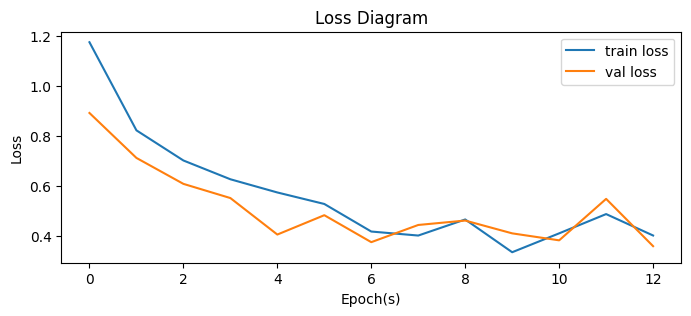

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('Loss Diagram')
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.show()

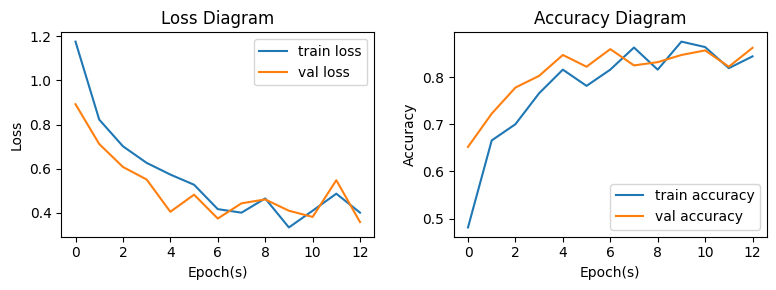

In [14]:
import matplotlib.pyplot as plt

# Assuming `history` is your training history object

plt.figure(figsize=(8, 3))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['loss'], label='train loss')
plt.plot(history.epoch, history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss Diagram')
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.epoch, history.history['accuracy'], label='train accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy Diagram')
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


Found 1444 images belonging to 3 classes.
46/46 [==============================] - 337s 7s/step


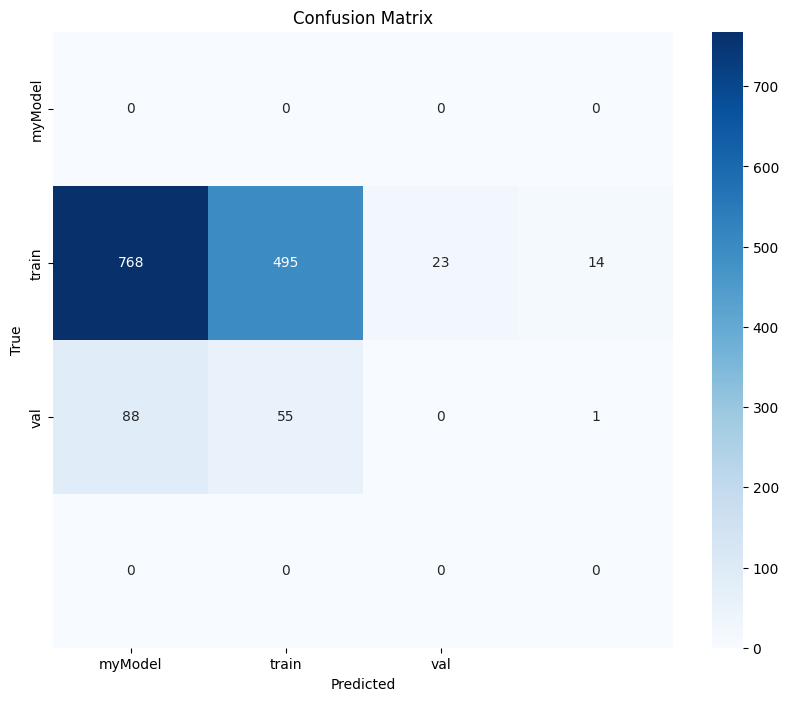

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat model yang telah disimpan
path_model_save = '/content/drive/MyDrive/TomatVision/myModel/finalModel.h5'
model = load_model(path_model_save)

# Menyiapkan generator untuk data validasi
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/TomatVision/',  # Ganti dengan path ke data Anda
    target_size=(299, 299),  # Sesuaikan dengan ukuran input model
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Jangan shuffle agar urutan tetap untuk confusion matrix
)

# Mendapatkan prediksi dari model terhadap data validasi
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)

# Mendapatkan label sebenarnya dari data validasi
y_true = validation_generator.classes

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Menampilkan label kelas
class_names = list(validation_generator.class_indices.keys())

# Visualisasi confusion matrix dengan label kelas
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Simpan Model

Jangan lupa untuk menyimpan model kalian

In [18]:
# save model
model.save('finalModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

path_model_save = '/content/drive/MyDrive/TomatVision/myModel/finalModel.h5'
loaded_model = load_model(path_model_save)

## Load Model dan Jalankan Model

Silakan gunakan model hasil training kalian untuk menklasifikasi sebuah gambar baru.

NOTE : Pastikan gambar yang kalian masukkan sesuai dengan dataset kalian.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  img_path = '/content/' + fn
  img = image.load_img(img_path, target_size=(224, 224));
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)

  classes = loaded_model.predict(img_array/255);

  for i, class_ in enumerate(classes[0]):
      if class_ == classes[0].max():
          if i == 0:
              print("busuk")
          elif i == 1:
              print("kriput")
          elif i == 2:
              print("masak")
          else:
              print("Mentah")

Saving r (2).jpg to r (2).jpg
1/1 [==============================] - 2s 2s/step
masak


In [21]:
!pip install tensorflow opencv-python-headless


In [22]:
import os

path_model_save = '/content/drive/MyDrive/TomatVision/myModel/finalModel.h5'
if os.path.exists(path_model_save):
    print("Model found.")
else:
    print("Model not found.")


Model found.


In [23]:
from google.colab import output

def enable_camera():
  output.eval_js('''
    async function enableCamera() {
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      const video = document.createElement('video');
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();
      google.colab.kernel.invokeFunction('notebook.run', [], {});
    }
    enableCamera();
  ''')

enable_camera()


In [24]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Muat model yang sudah dilatih
model = tf.keras.models.load_model('/content/drive/MyDrive/TomatVision/myModel/finalModel.h5')

# Label klasifikasi
labels = ["Tidak Lolos (Old)", "Tidak Lolos (Damaged)", "Tidak Lolos (Unripe)", "Lolos (Ripe)"]

# Fungsi untuk melakukan praproses gambar
def preprocess_image(img, target_size):
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Fungsi untuk melakukan prediksi pada satu frame
def predict(frame, model):
    processed_img = preprocess_image(frame, (224, 224))  # Sesuaikan dengan ukuran input model Anda
    predictions = model.predict(processed_img)
    return predictions

# Inisialisasi video capture (webcam)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Lakukan prediksi pada frame saat ini
    predictions = predict(frame, model)
    predicted_label = np.argmax(predictions, axis=1)[0]
    label = labels[predicted_label]

    # Tampilkan label pada frame
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Tampilkan frame hasil
    cv2_imshow(frame)

    # Tekan 'q' untuk keluar
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Setelah selesai, release capture
cap.release()
cv2.destroyAllWindows()
